### SkLearn metrics
Docs:
https://scikit-learn.org/stable/modules/model_evaluation.html

## Regression metrics:
**MSE** - Mean Square Error \
**MAE** - Mean Aeverage eroor \
**R2** - Determinations coef \
**etc**

## Ranking metrics (e.g. for recomendation engines)

more details: https://towardsdatascience.com/ranking-evaluation-metrics-for-recommender-systems-263d0a66ef54

**HR (Hit Ratio)** \
**MRR (Mean Reciprocal Rank)** \
**MAP (Mean Average Precision)** \
**NDCG (Normalized Discounted Cumulative Gain)** \

## Classification Metrics
**F1 score** 
**f1** = 2 * precision * recall / (precision+recall)  - harmonic mean \

**precision** = TP/(TP+FP) \

**recall** = TP/(TP+FN)

**Confusion_matrix example** \
**PR curve example** \
**ROC Curve example** \

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load model breast cancer data
data = load_breast_cancer()
X = data['data']
y = data['target']

([<matplotlib.patches.Wedge at 0x7ff5f9bee550>,
 [Text(0.428654794805217, 1.013042480299073, '0'),
  Text(-0.4286548896530974, -1.01304244016551, '1')],
 [Text(0.23381170625739106, 0.5525686256176761, '37%'),
  Text(-0.23381175799259854, -0.5525686037266418, '63%')])

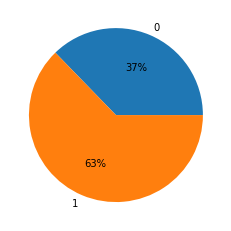

In [2]:
unique, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Fit a Naive Bayes model
clf = GaussianNB().fit(X_train, y_train)

# Predict probability
y_prob_train = clf.predict_proba(X_train)[:, 1]
y_prob_test = clf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)

Text(0.5, 1.0, 'Train Precision-Recall curve')

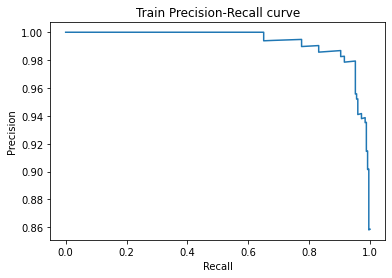

In [4]:
# plt.fill_between(recall, precision)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")

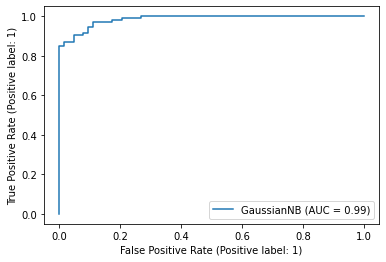

In [5]:
disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

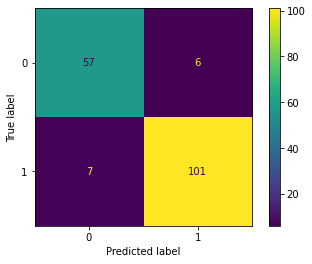

In [6]:
disp_c_m = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()